In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

%matplotlib inline

In [2]:
#https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
#libsvm

/srv/pq/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


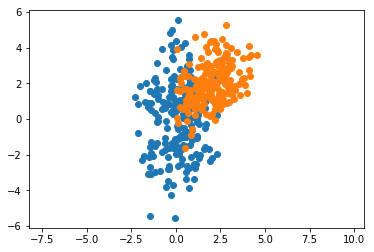

In [3]:
#Generate the data as a mixture of two Gaussians. 

m1 = [0, 0]
c1 = [[1, 0], [0, 4]]  

m2 = [2, 2]
c2 = [[1,1], [0, 1]]

#Total size
N = 200

#Mixing probability.
p = 0.2

d1 = np.random.multivariate_normal(m1, c1, N)
d2 = np.random.multivariate_normal(m2, c2, N)
plt.scatter(d1[:, 0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])
plt.axis('equal')
plt.show()

def create_dataset(m1, c1, m2, c2, N, p):
    d1 = np.random.multivariate_normal(m1, c1, N)
    d2 = np.random.multivariate_normal(m2, c2, N)
    label = np.random.binomial(1, p, size = N)
    c = (d1, d2)
    X = np.array([c[label[i]][i] for i in range(N)])
    y = 2*label - 1
    return(X, y)

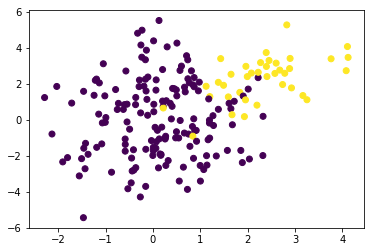

In [4]:
label = np.random.binomial(1, p, size = N)
c = (d1, d2)
X = np.array([c[label[i]][i] for i in range(N)])
y = 2*label - 1
plt.scatter(X[:, 0], X[:, 1], c = label)
plt.show()

In [5]:
#Taken from SVM tutorial

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

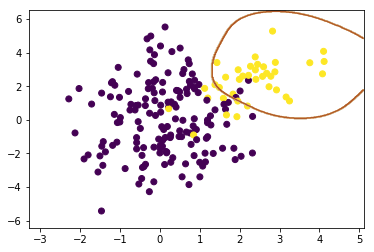

0.905


/srv/pq/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: covariance is not positive-semidefinite.


In [6]:
#Different kernels
clf = SVC(kernel = 'rbf', C =1)
clf.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c = label)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

#Replace by a new sample
d1_new = np.random.multivariate_normal(m1, c1, N)
d2_new = np.random.multivariate_normal(m2, c2, N)
label_new = np.random.binomial(1, p, size = N)
c = (d1_new, d2_new)
X_new = np.array([c[label[i]][i] for i in range(N)])
y_new = 2*label - 1
print(clf.score(X_new, y_new))

In [7]:
#HW: implement the guide: scaling, cross-validation, grid-search. What is the best accuracy you can get?
#HW: What is the best theoretical accuracy?

In [8]:
#HW: create a dataset of 3 mixed distributions and implement a OVA multiclass classification obtained from:
#Platt “Probabilistic outputs for SVMs and comparisons to regularized likelihood methods”
#for this you should use probability = True in SVC()

/srv/pq/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: covariance is not positive-semidefinite.


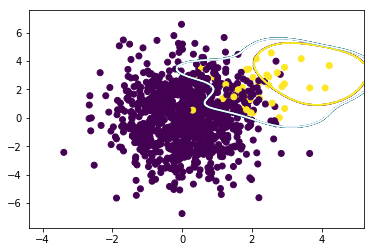

In [9]:
#Unbalanced classes
 
X, y = create_dataset(m1, c1, m2, c2, N=1000, p=0.05)

clf = SVC(kernel='rbf', C=1.0)
clf.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])

wclf = SVC(kernel='rbf', C=1.0, class_weight='balanced')
wclf.fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Zw = wclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zw = Zw.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.contour(xx, yy, Z, cmap='plasma') # :)
plt.contour(xx, yy, Zw, cmap = 'ocean')
plt.show()

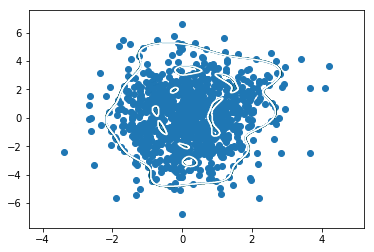

In [18]:
#One class SVM
from sklearn.svm import OneClassSVM

ocs = OneClassSVM(nu=0.1)
ocs.fit(X)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
Z = ocs.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.contour(xx, yy, Z, cmap = 'ocean')
plt.show()